# <center>STATISTICAL ANALYSIS OF BOSTONREAL ESTATE</center>

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* **CRIM** - per capita crime rate by town
* **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** - proportion of non-retail business acres per town
* **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* **NOX** - nitric oxides concentration (parts per 10 million)
* **RM** - average number of rooms per dwelling
* **AGE** - proportion of owner-occupied units built prior to 1940
* **DIS** - weighted distances to five Boston employment centres
* **RAD** - index of accessibility to radial highways
* **TAX** - full-value property-tax rate per \\$10,000
* **PTRATIO** - pupil-teacher ratio by town
* **LSTAT** - \% lower status of the population
* **MEDV** - median value of owner-occupied homes in \\$1000's

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install scipy
#!pip install seaborn
#!pip install matplotlib
#!pip install statsmodels

In [1]:
## Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
import statsmodels.api as sm
from statsmodels.formula.api import ols

# <center>_______________________________________________________________</center>

# <center>DATA ACQUISATION</center>

In [2]:
boston_df=pd.read_csv('https://github.com/efeyemez/Portfolio/raw/main/Datasets/boston_housing.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# <center>_______________________________________________________________</center>

# <center>DATA VISUALIZATION</center>

### 1 - Boxplot of the "Median value of owner-occupied homes"

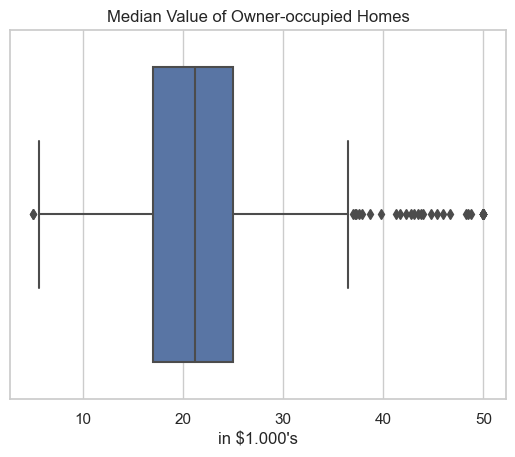

In [3]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='MEDV', data=boston_df).set(title= "Median Value of Owner-occupied Homes", xlabel='in $1.000\'s')

### 2 - Bar plot of the Charles River variable

In [4]:
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS2'] = 'Bounds the river'
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS2'] = 'Not bounds the river'
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Not bounds the river
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Not bounds the river
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Not bounds the river


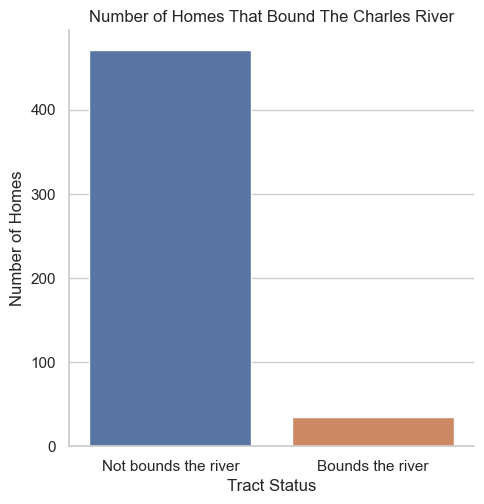

In [5]:
sns.set(style="whitegrid")
ax = sns.catplot(x="CHAS2", kind = 'count', data=boston_df).set(title= "Number of Homes That Bound The Charles River", xlabel='Tract Status', ylabel='Number of Homes')

### 3 - Boxplot of the MEDV variable vs the AGE variable

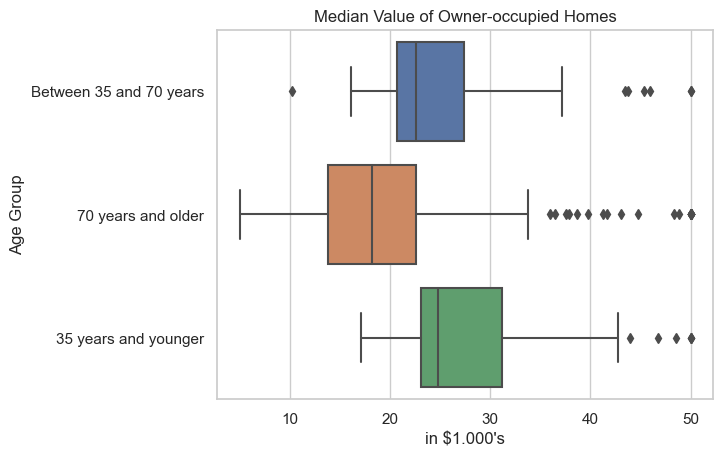

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='MEDV', y = 'AGE_GROUP', data=boston_df).set(title= "Median Value of Owner-occupied Homes", xlabel='in $1.000\'s', ylabel='Age Group')

### 4 - Scatter plot of the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

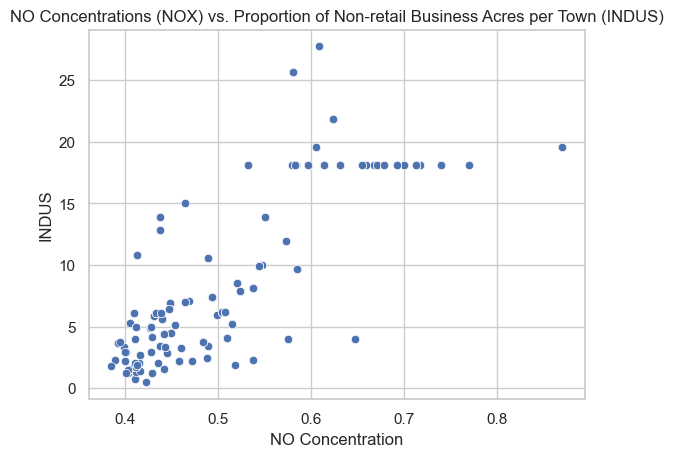

In [7]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set(title= "NO Concentrations (NOX) vs. Proportion of Non-retail Business Acres per Town (INDUS)", xlabel='NO Concentration', ylabel='INDUS')

# From the plot, we can state that there is a positive correlation between these two variables.

# <center>_______________________________________________________________</center>

# <center>STATISTICAL TESTS</center>

### 1 - Is there a significant difference in median value of houses (MEDV) bounded by the Charles River or not? (T-test for independent samples, without the knowledge of population variances)

**Hypotheses:**
* **H0**: Variance of MEDV values for the two groups are equal
* **H1**: Variance of MEDV values for the two groups are not equal

In [8]:
# Determining the equality of variances, with levene test

sps.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05, we reject the **H0** and can not assume equality of variance

**Hypotheses:**
* **H0**: Being bounded by Charles river does not affect the Median Value of Houses
* **H1**: Being bounded by Charles river affects the Median Value of Houses

In [9]:
sps.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)


Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

Since the p-value is less than 0.05 we reject the **H0**. Being bounded by Charles River effects the Median Value of Homes

### 2 - Is there a difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [10]:
# From previous examples,

boston_df.groupby('AGE_GROUP').agg({'MEDV':['mean', 'std', 'var']}).reset_index()

AGE_GROUP       MEDV                     
                                 mean       std        var
0     35 years and younger  27.775824  7.638198  58.342076
1       70 years and older  19.793380  9.515375  90.542369
2  Between 35 and 70 years  24.947656  6.969370  48.572120

**Hypotheses:**
* **H0**: Variance of MEDV values for the three groups are equal
* **H1**: Variance of MEDV values for the three groups are not equal

In [11]:
# Determining the equality of variances, with levene test

sps.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is more than 0.05, we can not reject the **H0** and can assume equality of variance

**Hypotheses:**
* **H0**: Age of houses does not affect the Median Value of Houses
* **H1**: Age of houses affects the Median Value of Houses

In [12]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

f_statistic, p_value = sps.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Since the p-value is less than 0.05 we reject the **H0**. Age of houses effects the Median Value of Homes.

### 3 - Can we conclude that there is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypotheses:**
* **H0**: NO Concentration is not correlated with Proportion of Non-retail Business Acres per Town
* **H1**: NO Concentration is correlated with Proportion of Non-retail Business Acres per Town

In [13]:
sps.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

Since the p-value is less than 0.05 we reject the **H0**. There is a relationship between NO Concentration and Proportion of Non-retail Business Acres per Town.

### 4 - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Hypotheses:**
* **H0**: Weighted distance to five Boston employement centers has no effect on median value of owner occupied homes
* **H1**: Weighted distance to five Boston employement centers has an effect on median value of owner occupied homes

In [14]:
## X is the input variable (or independent variable)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # Predictions, if needed.

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.21e-08
Time:                        18:15:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value is less than 0.05 we reject the **H0**. Weighted distance to five Boston employement centers (DIS) has as effect on Median value of owner occupied homes (MEDV).

The 'coef' value of DIS independent variable is **1,0916**. So the impact of an additional DIS value on the MEDV value is  **1,0916** * **\\$1000** = **$1091,6**.

# <center>_______________________________________________________________</center>

# <center>CONLUSIONS</center>

* From the first boxplot, it can be observed that mean value of "MEDV" is around \\$22.000 and observations have many outliers.

* From the bar plot, it can be observed that most of the houses do not bound the Charles River. In the first statistical test we tested whether being bounded by Charles River affects the Median Value of Homes and observed that indeed it affects.

* From the second boxplot, it can be observed that older houses have less "MEDV" values but there are exceptions in all age groups. In the the second statistical test we tested this hypothesis and find the relationship between the age of the houses and the Median Value of Homes.

* From the scatter plot, it can be observed that there is a positive correlation between the proportion of non-retail business acres per town (INDUS) and nitric oxide concentration (NOX). In the third statistical test, we tested whether there is a correlation between NOX and INDUS variables and observed that indeed there is.

* From the fourth statistical test it can be observed that Weighted distance to five Boston employement centers (DIS) has as effect on Median value of owner occupied homes (MEDV). We can also examine the details of this relationship from the regression table.

# <center>_______________________________________________________________</center>